# BIRDS 525 SPECIES- IMAGE CLASSIFICATION

## About Dataset

This version of the dataset `adds 10 new species` to the previous version. In addition using a dataset analysis tool I was able to clean the dataset so that there are `no duplicate or near-duplicate images` in the dataset. This ensures no leakage between the train, test and validation datasets. Also so defective low information images were also removed. So now you are using a clean dataset.

`Data set of 525 bird species. 84635 training images, 2625 test images(5 images per species) and 2625 validation images(5 images per species.` This is a very high quality dataset where there is only one bird in each image and the bird typically takes up at least 50% of the pixels in the image. As a result even a moderately complex model will achieve training and test accuracies in the mid 90% range. Note: all images are original and not created by augmentation

`All images are 224 X 224 X 3 color images in jpg format.` Data set includes a `train set, test set and validation set`. `Each set contains 525 sub directories, one for each bird species.` The data structure is convenient if you use the Keras ImageDataGenerator.flow_from_directory to create the train, test and valid data generators. The data set also include a file birds.csv. This cvs file `contains 5 columns.` The `filepaths column` contains the relative file path to an image file. The `labels column` contains the bird species class name associated with the image file. The `scientific label column` contains the latin scientific name for the image. The `data set column` denotes which dataset (train, test or valid) the filepath resides in. The `class_id column` contains the class index value associated with the image file's class.

`NOTE:` The test and validation images in the data set were hand selected to be the "best" images so your model will probably get the highest accuracy score using those data sets versus creating your own test and validation sets. However the latter case is more accurate in terms of model performance on unseen images.

Images were gathered from internet searches by species name. Once the image files for a species was downloaded they were checked for the presemce of duplicate or near duplicate images. All duplicate or near duplicate images detected were deleted in order to prevent their being images common between the training, test and validation sets.
After that the images were cropped so that the bird in most cases occupies at least 50% of the pixel in the image. Then the images were resized to 224 X 224 X3 in jpg format. The cropping ensures that when processed by a CNN their is adequate information in the images to create a highly accurate classifier. Even a moderately robust model should achieve training, validation and test accuracies in the high 90% range. Because of the large size of the dataset I recommend if you try to train a model use and image size of 150 X 150 X 3 in order to reduce training time. All files were also numbered sequential starting from one for each species. So test images are named 1.jpg to 5.jpg. Similarly for validation images. Training images are also numbered sequentially with "zeros" padding. For example 001.jpg, 002.jpg ….010.jpg, 011.jpg …..099.jpg, 100jpg, 102.jpg etc. The zero's padding preserves the file order when used with python file functions and Keras flow from directory.
The training set is not balanced, having a varying number of files per species. However each species has at least 130 training image files.
One significant shortcoming in the data set is the ratio of male species images to female species images. About 80% of the images are of the male and 20% of the female. Males typical are far more diversely colored while the females of a species are typically bland. Consequently male and female images may look entirely different .Almost all test and validation images are taken from the male of the species. Consequently the classifier may not perform as well on female specie images.

In [1]:
import os

In [2]:
%pwd

'd:\\ML Projects\\bird_type_classification_project\\research'

In [3]:
os.chdir('../')

In [4]:
%pwd

'd:\\ML Projects\\bird_type_classification_project'

### 1. Read the data

In [5]:
TRAIN_DATA_DIR = 'artifacts/data_ingestion/train'
TEST_DATA_DIR = 'artifacts/data_ingestion/test'
VAL_DATA_DIR = 'artifacts/data_ingestion/valid'

In [6]:
import pandas as pd
import random
# Generate dataframe for train, test, validation data with headers as `filepath`, `label`
def generate_dataframe(folder_path, classes, verbose = False):
    """_summary_

    Args:
        folder_path (_type_): _description_
        verbose (bool, optional): _description_. Defaults to False.

    Returns:
        _type_: _description_
    """

    # Since each subfolder name is a label, hence we need a list of labels.
    labels_list = os.listdir(folder_path)
    file_paths = []
    labels = []
    for label in labels_list:

        label_folder_path = os.path.join(folder_path, label)
        label_files_list = os.listdir(label_folder_path)

        temp_file_paths = []
        temp_labels = []

        for label_file in label_files_list:
            file_path = os.path.join(label_folder_path, label_file).replace('\\','/')
            temp_file_paths.append(file_path)
            temp_labels.append(label)
        
        if verbose:
            n = int(0.20 * len(temp_file_paths))
            file_paths.extend(random.sample(temp_file_paths, n))
            labels.extend(random.sample(temp_labels, n))
        else:
            file_paths.extend(temp_file_paths)
            labels.extend(temp_labels)

    df = pd.DataFrame({'filepath': file_paths, 'label': labels})

    df = df[df['label'].isin(classes)]

    return df

In [10]:
classes = ['ALBATROSS', 'ANTBIRD', 'BOBOLINK', 'COCKATOO', 'CROW']

In [11]:
train_df = generate_dataframe(TRAIN_DATA_DIR, classes)

In [12]:
train_df.shape

(768, 2)

<Axes: xlabel='label'>

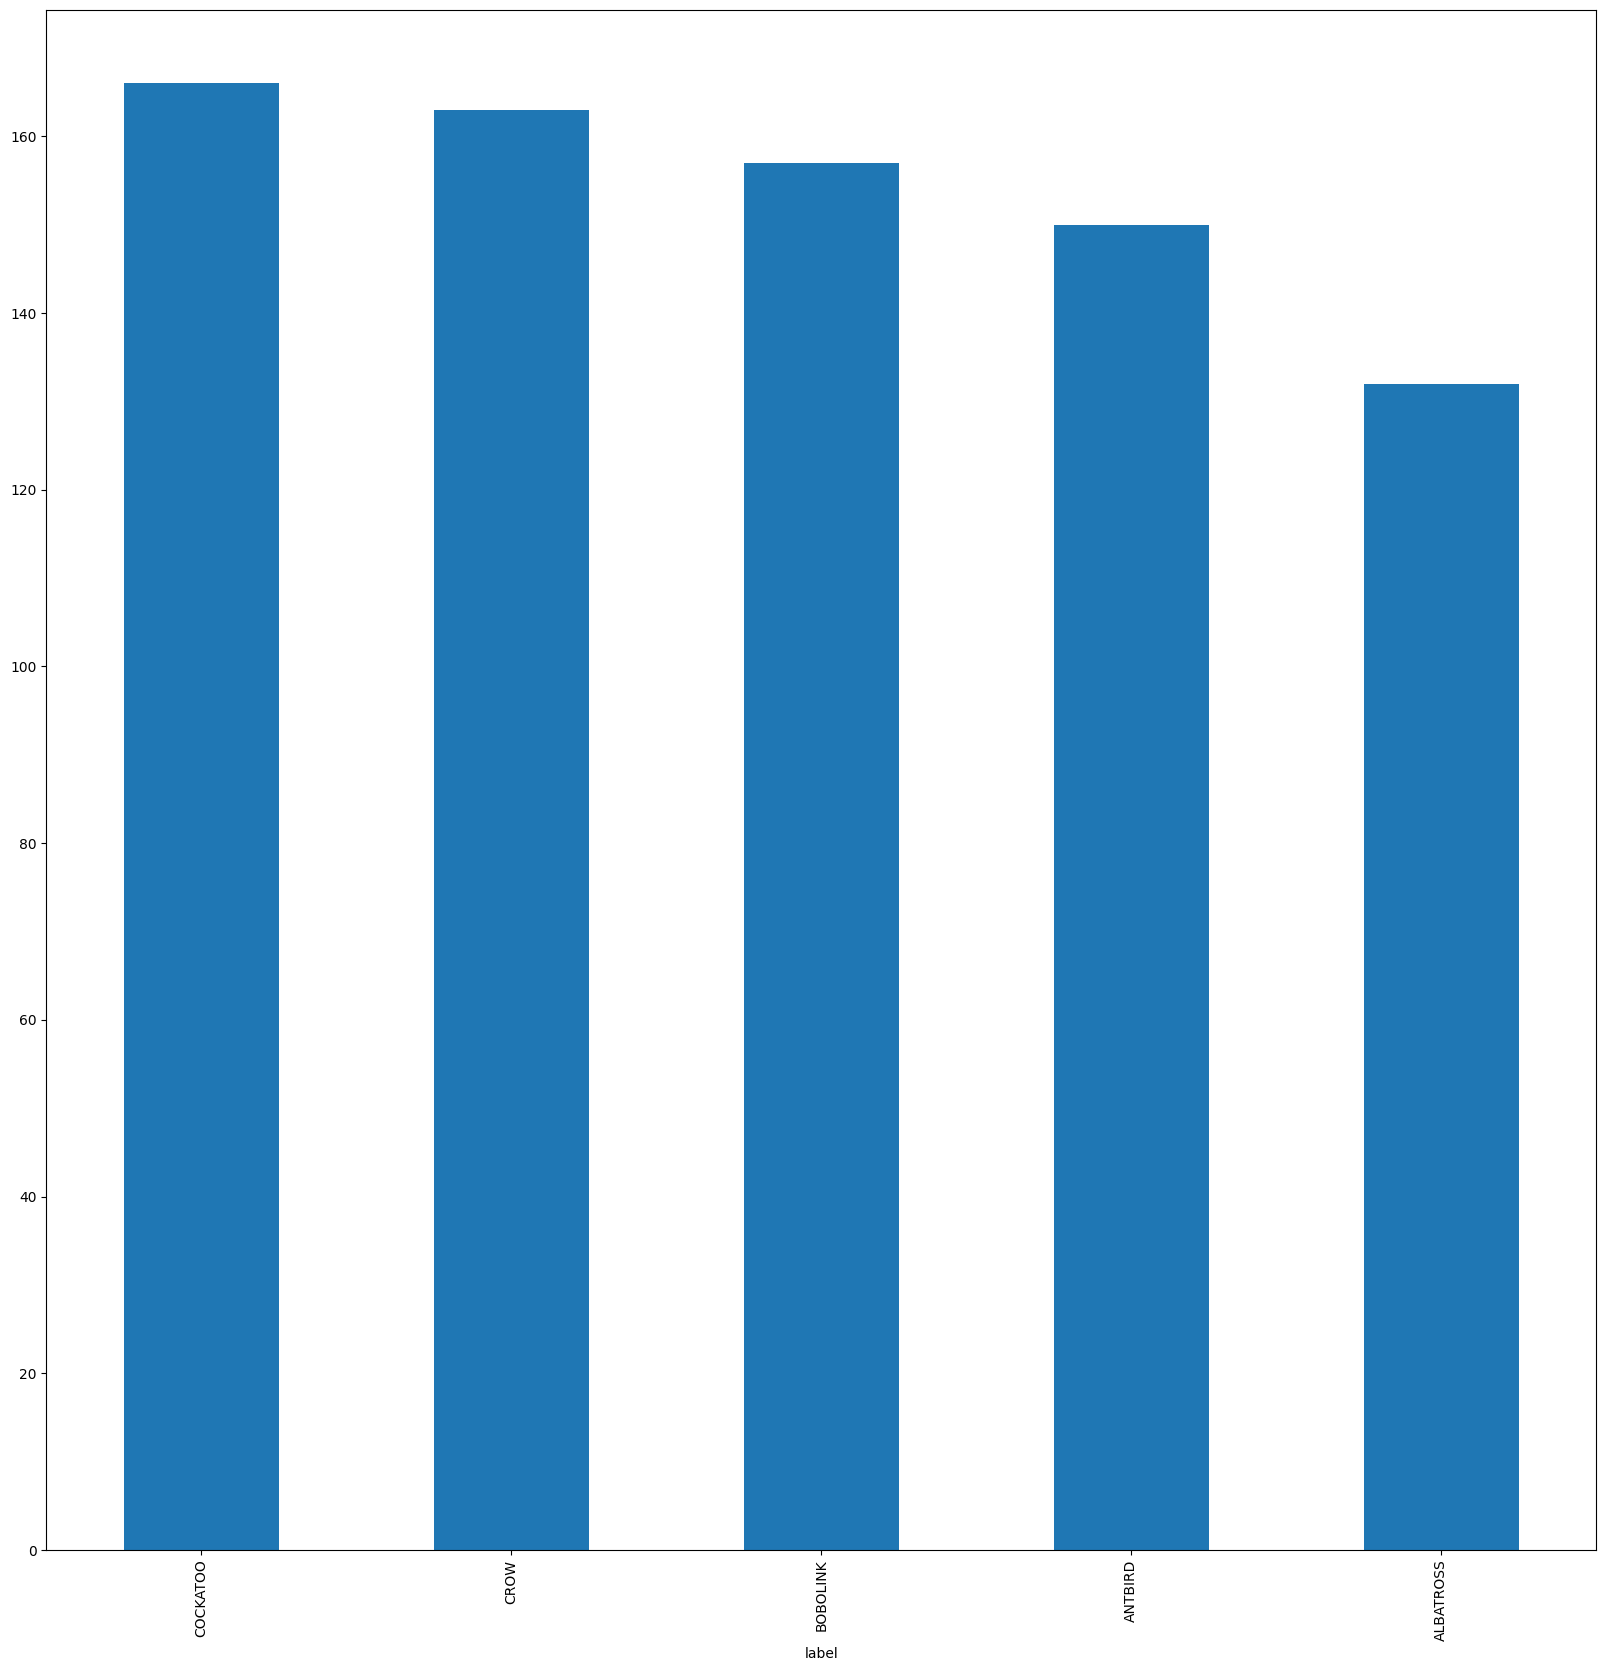

In [14]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,20))
train_df['label'].value_counts().plot(kind='bar')

In [15]:
test_df = generate_dataframe(TEST_DATA_DIR, classes)
valid_df = generate_dataframe(VAL_DATA_DIR, classes)

In [16]:
test_df

,filepath,label
45,artifacts/data_ingestion/test/ALBATROSS/1.jpg,ALBATROSS
46,artifacts/data_ingestion/test/ALBATROSS/2.jpg,ALBATROSS
47,artifacts/data_ingestion/test/ALBATROSS/3.jpg,ALBATROSS
48,artifacts/data_ingestion/test/ALBATROSS/4.jpg,ALBATROSS
49,artifacts/data_ingestion/test/ALBATROSS/5.jpg,ALBATROSS
160,artifacts/data_ingestion/test/ANTBIRD/1.jpg,ANTBIRD
161,artifacts/data_ingestion/test/ANTBIRD/2.jpg,ANTBIRD
162,artifacts/data_ingestion/test/ANTBIRD/3.jpg,ANTBIRD
163,artifacts/data_ingestion/test/ANTBIRD/4.jpg,ANTBIRD
164,artifacts/data_ingestion/test/ANTBIRD/5.jpg,ANTBIRD


In [17]:
valid_df

,filepath,label
45,artifacts/data_ingestion/valid/ALBATROSS/1.jpg,ALBATROSS
46,artifacts/data_ingestion/valid/ALBATROSS/2.jpg,ALBATROSS
47,artifacts/data_ingestion/valid/ALBATROSS/3.jpg,ALBATROSS
48,artifacts/data_ingestion/valid/ALBATROSS/4.jpg,ALBATROSS
49,artifacts/data_ingestion/valid/ALBATROSS/5.jpg,ALBATROSS
160,artifacts/data_ingestion/valid/ANTBIRD/1.jpg,ANTBIRD
161,artifacts/data_ingestion/valid/ANTBIRD/2.jpg,ANTBIRD
162,artifacts/data_ingestion/valid/ANTBIRD/3.jpg,ANTBIRD
163,artifacts/data_ingestion/valid/ANTBIRD/4.jpg,ANTBIRD
164,artifacts/data_ingestion/valid/ANTBIRD/5.jpg,ANTBIRD


### 2. Image Data Generator

In [18]:
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator

In [19]:
BATCH_SIZE = 32
IMG_SIZE = (224,224)
CHANNELS = 3
IMAGE_SHAPE = (IMG_SIZE[0], IMG_SIZE[1], CHANNELS)

tr_gen = ImageDataGenerator(rescale=1./255)
ts_gen = ImageDataGenerator(rescale=1./255)

train_gen = tr_gen.flow_from_dataframe(train_df,
                                       x_col='filepath',
                                       y_col='label',
                                       target_size=IMG_SIZE,
                                       color_mode='rgb',
                                       class_mode='categorical',
                                       shuffle=True,
                                       batch_size=BATCH_SIZE)

test_gen = ts_gen.flow_from_dataframe(test_df,
                                       x_col='filepath',
                                       y_col='label',
                                       target_size=IMG_SIZE,
                                       color_mode='rgb',
                                       class_mode='categorical',
                                       shuffle=True,
                                       batch_size=BATCH_SIZE)

valid_gen = ts_gen.flow_from_dataframe(valid_df,
                                       x_col='filepath',
                                       y_col='label',
                                       target_size=IMG_SIZE,
                                       color_mode='rgb',
                                       class_mode='categorical',
                                       shuffle=False,
                                       batch_size=BATCH_SIZE)

Found 768 validated image filenames belonging to 5 classes.
Found 25 validated image filenames belonging to 5 classes.
Found 25 validated image filenames belonging to 5 classes.


### 3. Sample plots from train data

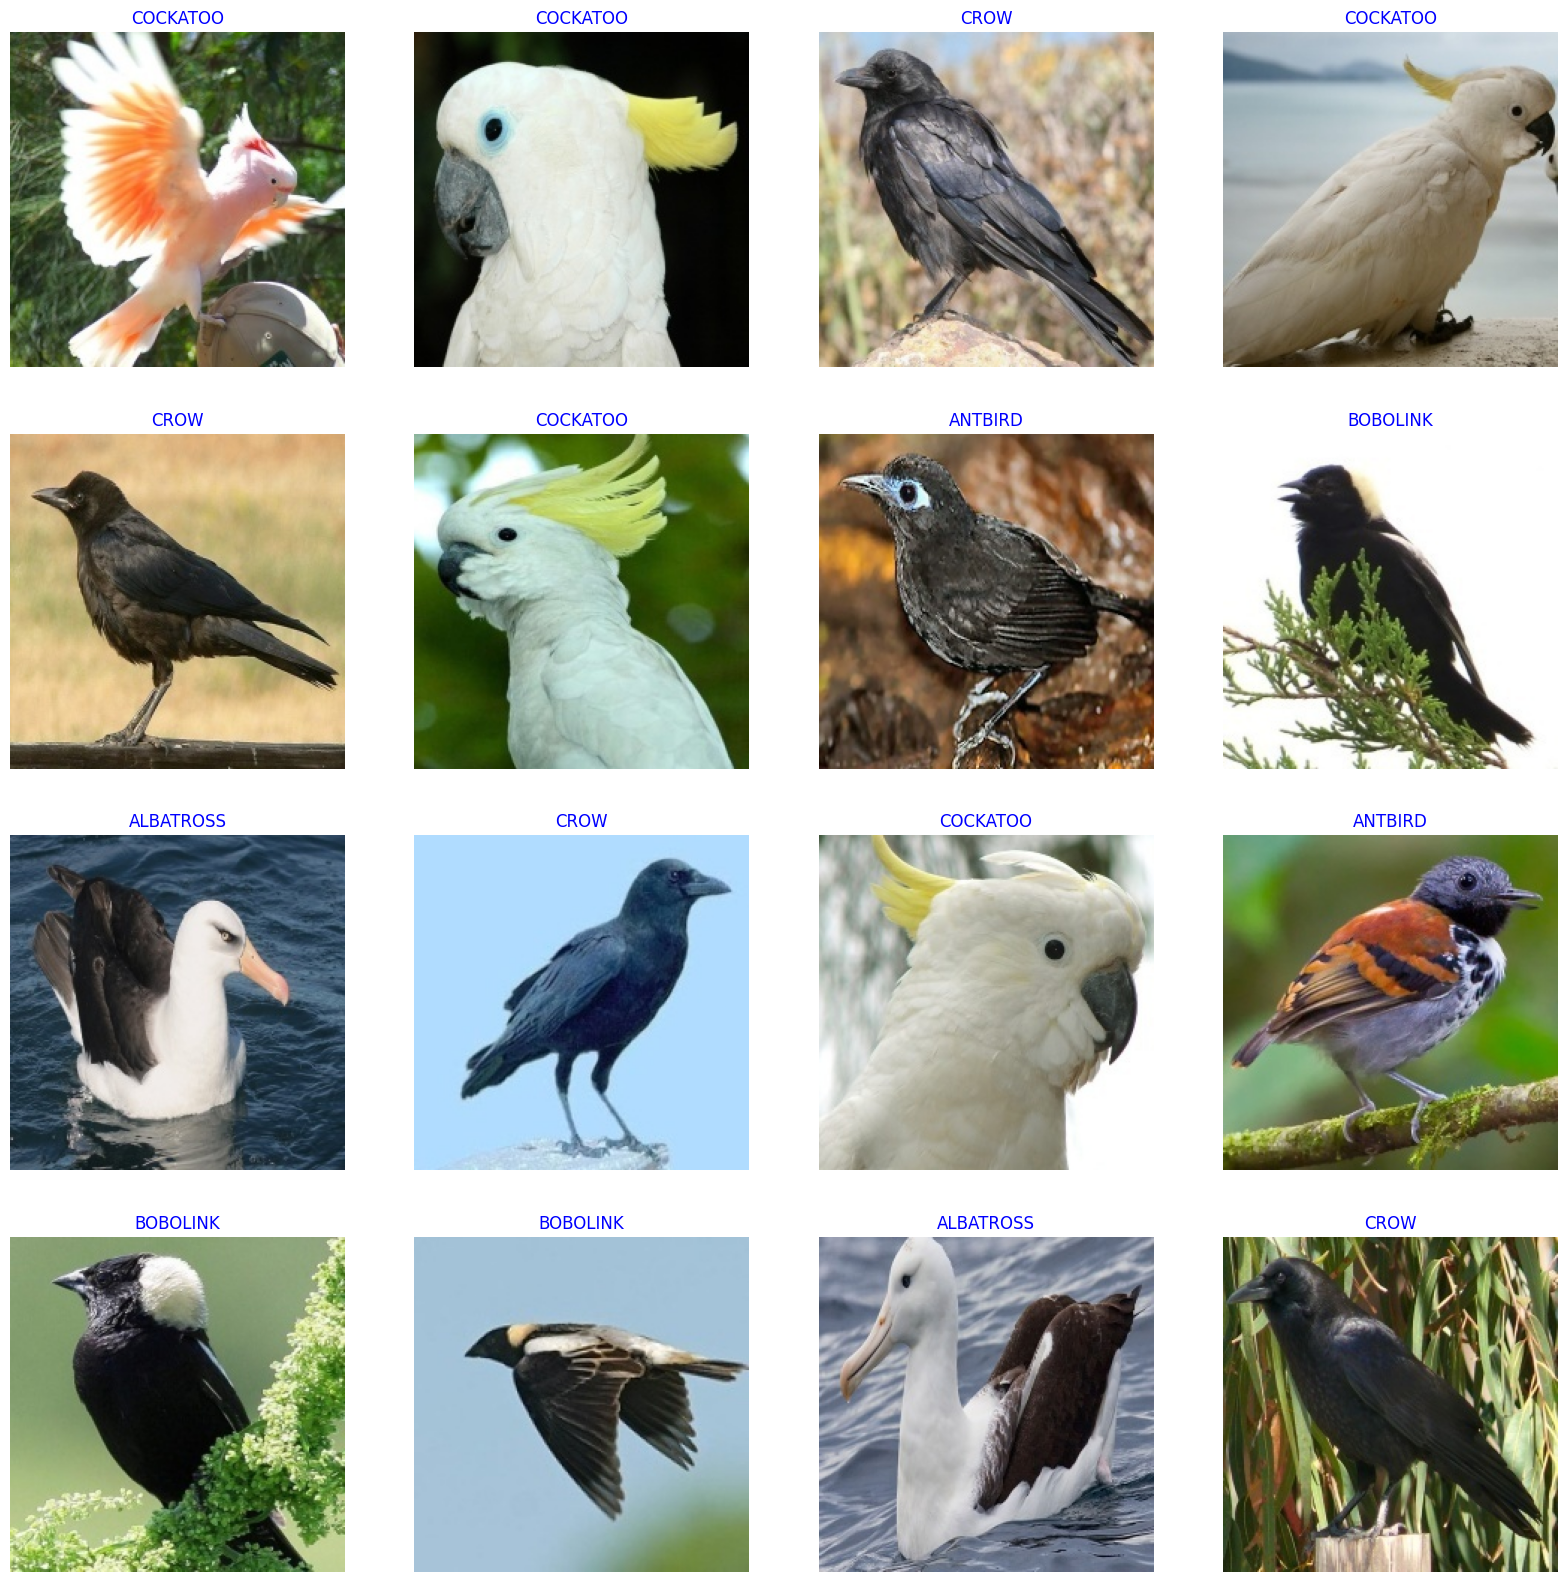

In [20]:
import matplotlib.pyplot as plt
import numpy as np

g_dict = train_gen.class_indices      # defines dictionary {'class': index}
classes = list(g_dict.keys())       # defines list of dictionary's kays (classes), classes names : string
images, labels = next(train_gen)      # get a batch size samples from the generator

plt.figure(figsize=(20,20))

for i in range(16):

    plt.subplot(4,4,i+1)
    image = images[i]
    plt.imshow(image)

    index = np.argmax(labels[i])
    class_name = classes[index]
    plt.title(class_name, color = 'blue', fontsize = 12)
    plt.axis('off')
plt.show()

### 4. Generic Model Creation

In [21]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam, Adamax
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Activation, Dropout, BatchNormalization
from tensorflow.keras import regularizers

# Create model structure
IMG_SIZE = (224, 224)
CHANNELS = 3
IMG_SHAPE = train_gen.image_shape
class_count = len(list(train_gen.class_indices.keys())) # to define number of classes in dense layer

# create pre-trained model
# we will use efficientnetb3 from EfficientNet family.
base_model = tf.keras.applications.efficientnet.EfficientNetB0(include_top= False, 
                                                          weights= "imagenet", 
                                                          input_shape= IMG_SHAPE, 
                                                          pooling= 'max')
model = Sequential([
    base_model,
    BatchNormalization(axis= -1, momentum= 0.99, epsilon= 0.001),
    Dense(256, kernel_regularizer= regularizers.l2(l= 0.016), activity_regularizer= regularizers.l1(0.006),
                bias_regularizer= regularizers.l1(0.006), activation= 'relu'),
    Dropout(rate= 0.45, seed= 123),
    Dense(class_count, activation= 'softmax')
])

model.compile(Adamax(learning_rate= 0.001), loss= 'categorical_crossentropy', metrics= ['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetb0 (Functional  (None, 1280)              4049571   
 )                                                               
                                                                 
 batch_normalization (Batch  (None, 1280)              5120      
 Normalization)                                                  
                                                                 
 dense (Dense)               (None, 256)               327936    
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 5)                 1285      
                                                                 
Total params: 4383912 (16.72 MB)
Trainable params: 43393

### 5. Train the model

In [22]:
BATCH_SIZE = 32   # set batch size for training
EPOCHS =  10  # number of all epochs in training
history = model.fit(x= train_gen, 
                    epochs= EPOCHS, 
                    verbose= 1, 
                    validation_data= valid_gen, 
                    validation_steps= None, 
                    shuffle= False,
                    use_multiprocessing=True,
                    workers=tf.data.experimental.AUTOTUNE)

Epoch 1/10
24/24 [==============================] - 120s 4s/step - loss: 8.0842 - accuracy: 0.7604 - val_loss: 10.7300 - val_accuracy: 0.2000
Epoch 2/10
24/24 [==============================] - 86s 4s/step - loss: 7.0046 - accuracy: 0.9583 - val_loss: 8.9510 - val_accuracy: 0.2000
Epoch 3/10
24/24 [==============================] - 84s 4s/step - loss: 6.3458 - accuracy: 0.9792 - val_loss: 8.1118 - val_accuracy: 0.2000
Epoch 4/10
24/24 [==============================] - 85s 4s/step - loss: 5.7843 - accuracy: 0.9883 - val_loss: 7.2713 - val_accuracy: 0.2000
Epoch 5/10
24/24 [==============================] - 87s 4s/step - loss: 5.2947 - accuracy: 0.9883 - val_loss: 6.6329 - val_accuracy: 0.2000
Epoch 6/10
24/24 [==============================] - 88s 4s/step - loss: 4.8332 - accuracy: 0.9987 - val_loss: 6.2114 - val_accuracy: 0.2000
Epoch 7/10
24/24 [==============================] - 88s 4s/step - loss: 4.4250 - accuracy: 0.9961 - val_loss: 5.9975 - val_accuracy: 0.2000
Epoch 8/10
24/24 [

### 6. Display Model Performance

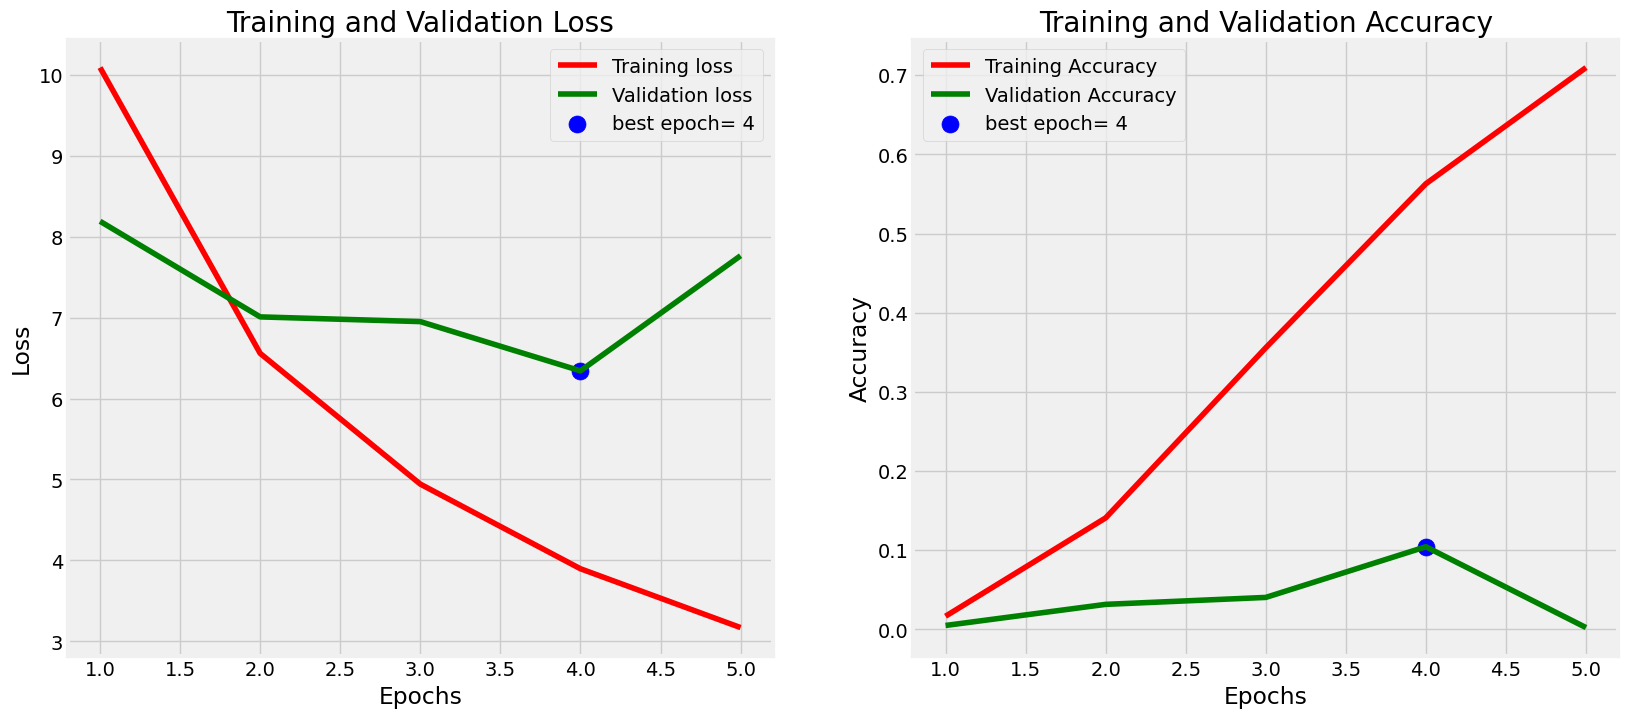

In [18]:
# Define needed variables
tr_acc = history.history['accuracy']
tr_loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']
index_loss = np.argmin(val_loss)
val_lowest = val_loss[index_loss]
index_acc = np.argmax(val_acc)
acc_highest = val_acc[index_acc]
Epochs = [i+1 for i in range(len(tr_acc))]
loss_label = f'best epoch= {str(index_loss + 1)}'
acc_label = f'best epoch= {str(index_acc + 1)}'
# Plot training history
plt.figure(figsize= (20, 8))
plt.style.use('fivethirtyeight')
plt.subplot(1, 2, 1)
plt.plot(Epochs, tr_loss, 'r', label= 'Training loss')
plt.plot(Epochs, val_loss, 'g', label= 'Validation loss')
plt.scatter(index_loss + 1, val_lowest, s= 150, c= 'blue', label= loss_label)
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(Epochs, tr_acc, 'r', label= 'Training Accuracy')
plt.plot(Epochs, val_acc, 'g', label= 'Validation Accuracy')
plt.scatter(index_acc + 1 , acc_highest, s= 150, c= 'blue', label= acc_label)
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.tight_layout
plt.show()

### 7. Model Evaluation

In [19]:
ts_length = len(test_df)
test_batch_size = max(sorted([ts_length // n for n in range(1, ts_length + 1) if ts_length%n == 0 and ts_length/n <= 80]))
test_steps = ts_length // test_batch_size

train_score = model.evaluate(train_gen, steps= test_steps, verbose= 1)
valid_score = model.evaluate(valid_gen, steps= test_steps, verbose= 1)
test_score = model.evaluate(test_gen, steps= test_steps, verbose= 1)
print("Train Loss: ", train_score[0])
print("Train Accuracy: ", train_score[1])
print('-' * 20)
print("Validation Loss: ", valid_score[0])
print("Validation Accuracy: ", valid_score[1])
print('-' * 20)
print("Test Loss: ", test_score[0])
print("Test Accuracy: ", test_score[1])

35/35 [==============================] - 23s 650ms/step - loss: 7.7482 - accuracy: 0.0027
Train Loss:  7.802575588226318
Train Accuracy:  0.0026785715017467737
--------------------
Validation Loss:  7.838863849639893
Validation Accuracy:  0.0
--------------------
Test Loss:  7.748190879821777
Test Accuracy:  0.0026785715017467737


### 8. Get Predictions

In [28]:
preds = model.predict_generator(test_gen)
y_pred = np.argmax(preds, axis=1)

C:\conda_tmp\ipykernel_23944\2815406075.py:1: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  preds = model.predict_generator(test_gen)


In [29]:
y_pred

array([4, 3, 2, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4], dtype=int64)

### 7. Confusion Matrix

In [30]:
y_pred

array([4, 3, 2, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4], dtype=int64)

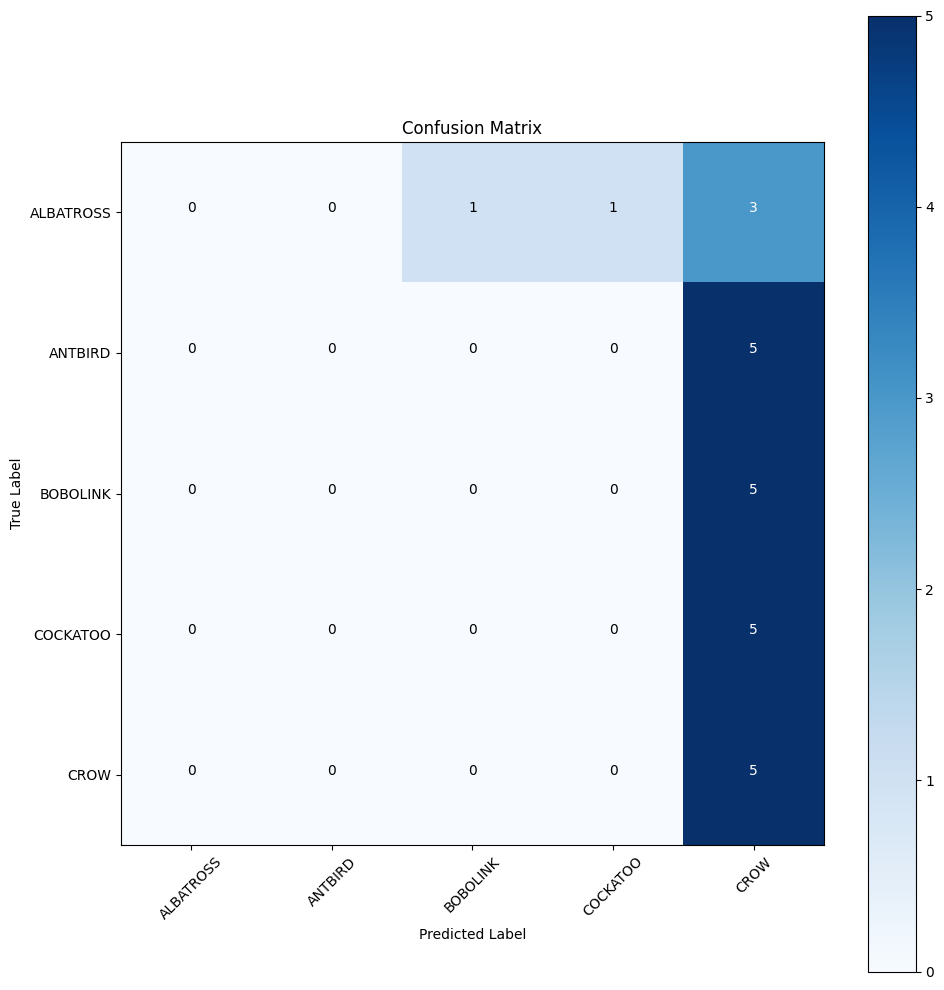

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
import itertools
g_dict = test_gen.class_indices
classes = list(g_dict.keys())

# Confusion matrix
cm = confusion_matrix(test_gen.classes, y_pred)

plt.figure(figsize= (10, 10))
plt.imshow(cm, interpolation= 'nearest', cmap= plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()

tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation= 45)
plt.yticks(tick_marks, classes)
thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, cm[i, j], horizontalalignment= 'center', color= 'white' if cm[i, j] > thresh else 'black')
    plt.tight_layout()
plt.ylabel('True Label')
plt.xlabel('Predicted Label')

plt.show()

In [34]:
# Classification report
print(classification_report(test_gen.classes, y_pred, target_names= classes))

              precision    recall  f1-score   support

   ALBATROSS       0.00      0.00      0.00         5
     ANTBIRD       0.00      0.00      0.00         5
    BOBOLINK       0.00      0.00      0.00         5
    COCKATOO       0.00      0.00      0.00         5
        CROW       0.22      1.00      0.36         5

    accuracy                           0.20        25
   macro avg       0.04      0.20      0.07        25
weighted avg       0.04      0.20      0.07        25



d:\ML Projects\mlvenv\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
d:\ML Projects\mlvenv\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
d:\ML Projects\mlvenv\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### 8. Save Model

In [ ]:
#Save the model
# model.save('model.h5')

### 9. Prediction using loaded_model

In [ ]:
# loaded_model = tf.keras.models.load_model('/kaggle/working/model.h5', compile=False)
# loaded_model.compile(Adamax(learning_rate= 0.001), loss= 'categorical_crossentropy', metrics= ['accuracy'])

In [ ]:
# mage_path = '/kaggle/input/100-bird-species/test/ALPINE CHOUGH/4.jpg'
# image = Image.open(image_path)

# # Preprocess the image
# img = image.resize((224, 224))
# img_array = tf.keras.preprocessing.image.img_to_array(img)
# img_array = tf.expand_dims(img_array, 0)

# # Make predictions
# predictions = loaded_model.predict(img_array)
# class_labels = classes
# score = tf.nn.softmax(predictions[0])
# print(f"{class_labels[tf.argmax(score)]}")

## `Note:`
#### Model is poorly performing right now due to under training measures (reduction in training data to 25%).
#### Due to limit compute power, I have not trained the model with good accuracy.
#### However, with original train data and got compute power (like cloud), Model's accuracy can be improved. 

In [39]:
# Code for entity
from dataclasses import dataclass
from pathlib import Path

@dataclass(frozen=True)
class PrepareBaseModelConfig:
    root_dir: Path
    base_model_path: Path
    updated_base_model_path: Path
    params_image_size: list
    params_learning_rate: float
    params_include_top: bool
    params_weights: str
    params_classes: int
    params_acceptable_classes: list
    params_pooling: str

In [40]:
# Code for Configuration
from cnnClassifier.constants import *
from cnnClassifier.utils.common import read_yaml, create_directories

class ConfigurationManager:
    
    def __init__(self, 
        config_filepath = CONFIG_FILE_PATH,
        params_filepath = PARAMS_FILE_PATH):

        self.config = read_yaml(config_filepath)
        self.params = read_yaml(params_filepath)
        create_directories([self.config.artifacts_root])

    def get_prepare_base_model_config(self) -> PrepareBaseModelConfig:
        config = self.config.prepare_base_model
        
        create_directories([config.root_dir])

        prepare_base_model_config = PrepareBaseModelConfig(
            root_dir=Path(config.root_dir),
            base_model_path=Path(config.base_model_path),
            updated_base_model_path=Path(config.updated_base_model_path),
            params_image_size=self.params.IMAGE_SIZE,
            params_learning_rate=self.params.LEARNING_RATE,
            params_include_top=self.params.INCLUDE_TOP,
            params_weights=self.params.WEIGHTS,
            params_classes=self.params.CLASSES,
            params_acceptable_classes=self.params.ACCEPTABLE_CLASSES,
            params_pooling=self.params.POOLING
        )

        return prepare_base_model_config    


In [49]:
# Code for Component
import os
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam, Adamax
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Activation, Dropout, BatchNormalization
from tensorflow.keras import regularizers

class PrepareBaseModel:

    def __init__(self, config: PrepareBaseModelConfig) -> None:
        self.config = config
    
    def get_base_model(self):

        self.model = tf.keras.applications.efficientnet.EfficientNetB0(include_top= self.config.params_include_top, 
                                                          weights= self.config.params_weights, 
                                                          input_shape= self.config.params_image_size, 
                                                          pooling= self.config.params_pooling)
        self.save_model(path=self.config.base_model_path, model=self.model)
    
    @staticmethod
    def _prepara_full_model(model, classes, freeze_all, freeze_till, learning_rate):
        if freeze_all:
            for layer in model.layers:
                model.trainable = False
        elif (freeze_till is not None) and (freeze_till > 0):
            for layer in model.layers[:-freeze_till]:
                model.trainable = False

        full_model = Sequential([model,
                                 BatchNormalization(axis= -1, momentum= 0.99, epsilon= 0.001),
                                 Dense(256, kernel_regularizer= regularizers.l2(l= 0.016), 
                                       activity_regularizer= regularizers.l1(0.006),
                                       bias_regularizer= regularizers.l1(0.006), activation= 'relu'),
                                Dropout(rate= 0.45, seed= 123),
                                Dense(classes, activation= 'softmax')])
        
        full_model.compile(Adamax(learning_rate= learning_rate), loss= 'categorical_crossentropy', metrics= ['accuracy'])
        
        full_model.summary()

        return full_model
    
    def update_base_model(self):
        
        self.full_model = self._prepara_full_model(
            model=self.model,
            classes=self.config.params_classes,
            freeze_all=True,
            freeze_till=None,
            learning_rate=self.config.params_learning_rate
        )

        self.save_model(path=self.config.updated_base_model_path, model=self.full_model)


    @staticmethod
    def save_model(path: Path, model: tf.keras.Model):
        model.save(path)

In [50]:
# Code for Pipeline
try:
    config = ConfigurationManager()
    prepare_base_model_config = config.get_prepare_base_model_config()
    prepare_base_model = PrepareBaseModel(config=prepare_base_model_config)
    prepare_base_model.get_base_model()
    prepare_base_model.update_base_model()
except Exception as e:
    raise e

[19-Nov-23 19:18:19: INFO: common: config\config.yaml loaded successfully.]
[19-Nov-23 19:18:19: INFO: common: params.yaml loaded successfully.]
[19-Nov-23 19:18:19: INFO: common: Created directory at: artifacts]
[19-Nov-23 19:18:19: INFO: common: Created directory at: artifacts/prepare_base_model]
[19-Nov-23 19:18:21: WARNING: saving_utils: Compiled the loaded model, but the compiled metrics have yet to be built. `model.compile_metrics` will be empty until you train or evaluate the model.]
Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetb0 (Functional  (None, 1280)              4049571   
 )                                                               
                                                                 
 batch_normalization_3 (Bat  (None, 1280)              5120      
 chNormalization)                                                
                    